<a href="https://colab.research.google.com/github/AvisP/Nest-Seq-Analysis/blob/main/notebooks/Notmat2dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
base_path = '/content/gdrive/My Drive/ZFDataset/'

In [ ]:
syllable_df_Nest_Total = pd.read_pickle(base_path+'Nest1_Densenet121.pkl')

In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram,labels_indv,densenet121_features
0,0.103084,0.133787,-,cyea,1,cyea_0000,"[-0.0037507678, -0.0037730576, -0.0033396403, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_-,"[0.00036964213, 0.0061388216, 0.0023623325, 0...."
1,0.197664,0.342063,a,cyea,2,cyea_0000,"[-0.0016009295, -0.00080086064, 0.00024397256,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_a,"[0.00039546576, 0.0042689457, 0.0021646945, 0...."
2,0.369546,0.536848,b,cyea,3,cyea_0000,"[0.0028250518, 0.0025573175, 0.002130959, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_b,"[0.00043923515, 0.0035873966, 0.0023025582, 0...."
3,0.559955,0.687823,c,cyea,4,cyea_0000,"[0.00036472746, 0.00013401418, -0.00052369735,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_c,"[0.0004885812, 0.0055127405, 0.0017675881, 0.0..."
4,0.726644,0.832925,d,cyea,5,cyea_0000,"[0.0033374317, 0.004109387, 0.003555804, 0.002...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",cyea_d,"[0.00040706727, 0.004342597, 0.0018088806, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...
2934,0.102356,0.135123,0,phpd,1,phpd_0062,"[-0.0035796678, 0.00066409475, 0.0039508683, 0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00035229328, 0.0069653825, 0.00236547, 0.00..."
2935,0.228433,0.287435,0,phpd,2,phpd_0062,"[0.0010511333, 0.00033233757, -0.00028101055, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00036833377, 0.006149904, 0.0025585291, 0.0..."
2936,0.323399,0.392424,0,phpd,3,phpd_0062,"[0.0036439702, 0.001985288, 0.00042269952, -0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00036655215, 0.005553442, 0.0027189297, 0.0..."
2937,0.426528,0.540746,0,phpd,4,phpd_0062,"[0.007070427, 0.0066078743, 0.0063827583, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",phpd_0,"[0.00043264066, 0.004336921, 0.002199093, 0.00..."


In [ ]:
Nest1 = pd.read_pickle(base_path+'zf_Nest1_noRescale1.pickle')

In [ ]:
Nest1

,start_time,end_time,labels,indv,indvi,key,audio,rate,spectrogram
0,0.103084,0.133787,-,cyea,1,cyea_0000,"[-0.0037507678, -0.0037730576, -0.0033396403, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0.197664,0.342063,a,cyea,2,cyea_0000,"[-0.0016009295, -0.00080086064, 0.00024397256,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0.369546,0.536848,b,cyea,3,cyea_0000,"[0.0028250518, 0.0025573175, 0.002130959, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0.559955,0.687823,c,cyea,4,cyea_0000,"[0.00036472746, 0.00013401418, -0.00052369735,...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0.726644,0.832925,d,cyea,5,cyea_0000,"[0.0033374317, 0.004109387, 0.003555804, 0.002...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...
2934,0.102356,0.135123,0,phpd,1,phpd_0062,"[-0.0035796678, 0.00066409475, 0.0039508683, 0...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2935,0.228433,0.287435,0,phpd,2,phpd_0062,"[0.0010511333, 0.00033233757, -0.00028101055, ...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2936,0.323399,0.392424,0,phpd,3,phpd_0062,"[0.0036439702, 0.001985288, 0.00042269952, -0....",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2937,0.426528,0.540746,0,phpd,4,phpd_0062,"[0.007070427, 0.0066078743, 0.0063827583, 0.00...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
ls

gdrive/  Nest-Seq-Analysis/  sample_data/


In [3]:
!git clone https://github.com/AvisP/Nest-Seq-Analysis.git

Cloning into 'Nest-Seq-Analysis'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 91 (delta 21), reused 48 (delta 3), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [4]:
cd Nest-Seq-Analysis/

/content/Nest-Seq-Analysis


In [5]:
ls

avgn/  models/  notebooks/  README.md  scripts/


In [6]:
pip install pathlib2

In [53]:
from joblib import Parallel, delayed
import tqdm
import pandas as pd
pd.options.display.max_columns = None
import librosa
from datetime import datetime
import numpy as np
import pathlib2

In [8]:
import avgn
from avgn.custom_parsing.bengalese_finch_sakata import (
    generate_json_wav_not_mat,
    parse_song_df,
)
from avgn.utils.paths import DATA_DIR

/content/Nest-Seq-Analysis/avgn/utils/general.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [9]:
DATASET_ID = 'zebra_finch_sakata'
species = "Taeniopygia guttata"
common_name = "Zebra Finch"

DT_ID = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
DT_ID

'2021-06-24_21-38-51'

In [10]:
pwd

'/content/Nest-Seq-Analysis'

In [56]:
# DSLOC = avgn.utils.paths.Path('I:/ZebraFinchGenerations/Nest5')
DSLOC = avgn.utils.paths.Path('/content/gdrive/MyDrive/ZFDataset/Nest6/isab')
DSLOC

PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab')

## DSLOC is single folder 


In [88]:
WAVLIST = list((DSLOC).expanduser().glob('*.wav'))
len(WAVLIST), WAVLIST[0]

MATLIST = list((DSLOC).expanduser().glob('*.wav.not.mat'))
len(MATLIST), MATLIST[0]

song_df = parse_song_df(WAVLIST,MATLIST)

song_df[:3]

wav_names = np.array([i.name for i in WAVLIST])


 50%|█████     | 15/30 [00:00<00:00, 147.51it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files



100%|██████████| 30/30 [00:00<00:00, 143.47it/s]


In [89]:
wav_names

array(['isab_48145024.wav', 'isab_54761059.wav', 'isab_58522509.wav',
       'isab_58555404.wav', 'isab_59731544.wav', 'isab_62727694.wav',
       'isab_72802769.wav', 'isab_74112524.wav', 'isab_67651004.wav',
       'isab_57835804.wav', 'isab_38111124.wav', 'isab_38095304.wav',
       'isab_46138974.wav', 'isab_35288289.wav', 'isab_37581860.wav',
       'isab_63795364.wav', 'isab_38063159.wav', 'isab_37692554.wav',
       'isab_47150411.wav', 'isab_60694074.wav', 'isab_60052054.wav',
       'isab_67949742.wav', 'isab_48469594.wav', 'isab_41794694.wav',
       'isab_42299569.wav', 'isab_38615434.wav', 'isab_47157044.wav',
       'isab_40100004.wav', 'isab_60106304.wav', 'isab_46124724.wav'],
      dtype='<U17')

## DSLOC has multiple folders

In [17]:
folder_list = list((DSLOC).expanduser().glob('*'))

WAVPATH = []

for idx, folder_path in enumerate(folder_list):
    WAVLIST = list((pathlib2.Path(folder_path.parent,folder_path.parts[-1])).expanduser().glob('*.wav'))
    MATLIST = list((pathlib2.Path(folder_path.parent,folder_path.parts[-1])).expanduser().glob('*.wav.not.mat'))
    song_temp = parse_song_df(WAVLIST,MATLIST)
    if idx == 0:
        song_df = song_temp
        wav_names = np.array([i.name for i in WAVLIST])
        WAVPATH = WAVLIST
    else:
        song_df = pd.concat([song_df, song_temp], axis=0, ignore_index=True)
        wav_names = np.concatenate((wav_names, np.array([i.name for i in WAVLIST])), axis=0)
        WAVPATH = WAVPATH + WAVLIST
    
# song_df = song_df.drop(columns='index')
WAVLIST = WAVPATH

 19%|█▉        | 12/64 [00:00<00:00, 117.85it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files


 38%|███▊      | 17/45 [00:00<00:00, 155.53it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files


100%|██████████| 30/30 [00:00<00:00, 154.18it/s]

Expected wav file format structure : wh70bk90_May_07_2020_26053151_Copy.wav
All wav files have corresponding not.mat files


In [51]:
WAVLIST

[PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_48145024.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_54761059.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_58522509.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_58555404.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_59731544.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_62727694.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_72802769.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_74112524.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_67651004.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_57835804.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_38111124.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_38095304.wav'),
 PosixPath('/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_46

# Common section for both


In [91]:
Parallel(n_jobs=1, verbose=10)(
    delayed(generate_json_wav_not_mat)(row, WAVLIST, wav_names, DT_ID, species, common_name, DATASET_ID)
    for idx, row in tqdm(song_df.iterrows(), total=len(song_df))
);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s


/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_72802769.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_62727694.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_59731544.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_58555404.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_58522509.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_54761059.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_48145024.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_35288289.wav


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_37581860.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_37692554.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_38063159.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_38095304.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_38111124.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_38615434.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_40100004.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_41794694.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_42299569.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_46124724.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_46138974.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_47150411.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_47157044.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_48469594.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_57835804.wav
/content/gdrive/MyDrive/ZFDataset/Nest6/isab/isab_60052

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


In [61]:
pip install noisereduce

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
#import umap
import pandas as pd

from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

from avgn.signalprocessing.create_spectrogram_dataset import prepare_wav, create_label_df, get_row_audio
from avgn.visualization.spectrogram import plot_spec
from avgn.song_segmentation.dynamic_thresholding import norm

In [63]:
DATASET_ID = 'zebra_finch_sakata'

hparams = HParams(
    n_fft = 4096,
    mel_lower_edge_hertz=500,
    mel_upper_edge_hertz=15000,  # Should be sample_rate / 2 or less
    butter_lowcut = 500,
    butter_highcut = 15000,
    ref_level_db = 20,
    min_level_db = -100,
    win_length_ms = 10,
    hop_length_ms = 1,
    num_mel_bins = 32,
    mask_spec = True,
    n_jobs = 1,  # Makes processing serial if set to 1, parallel processing giving errors
    verbosity=1,
    nex = -1
)

In [64]:
dataset = DataSet(DATASET_ID, hparams = hparams)
dataset.sample_json
len(dataset.data_files)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s finished


29

In [67]:
### Create dataset based upon JSON

from joblib import Parallel, delayed
n_jobs = 1; verbosity = 10

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(create_label_df)(
            dataset.data_files[key].data,
            hparams=dataset.hparams,
            labels_to_retain=['labels'],
            unit="syllables",
            dict_features_to_retain = [],
            key = key,
        )
        for key in tqdm(dataset.data_files.keys())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.1s finished


1110

In [68]:
## Add wav location and audio to dataframe

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    syllable_dfs = parallel(
        delayed(get_row_audio)(
            syllable_df[syllable_df.key == key], 
            dataset.data_files[key].data['wav_loc'], 
            dataset.hparams
        )
        for key in tqdm(syllable_df.key.unique())
    )
syllable_df = pd.concat(syllable_dfs)
len(syllable_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/content/Nest-Seq-Analysis/avgn/signalprocessing/create_spectrogram_dataset.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for st, et in zip(syllable_df.start_time.values, syllable_df.end_time.values)
/content/Nest-Seq-Analysis/avgn/signalprocessing/create_spectrogram_dataset.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syllable_df["rate"] = rate
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remai

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.5s finished


1110

In [69]:
# Check for bad audio files
df_mask  = np.array([len(i) > 0 for i in tqdm(syllable_df.audio.values)])
syllable_df = syllable_df[np.array(df_mask)]

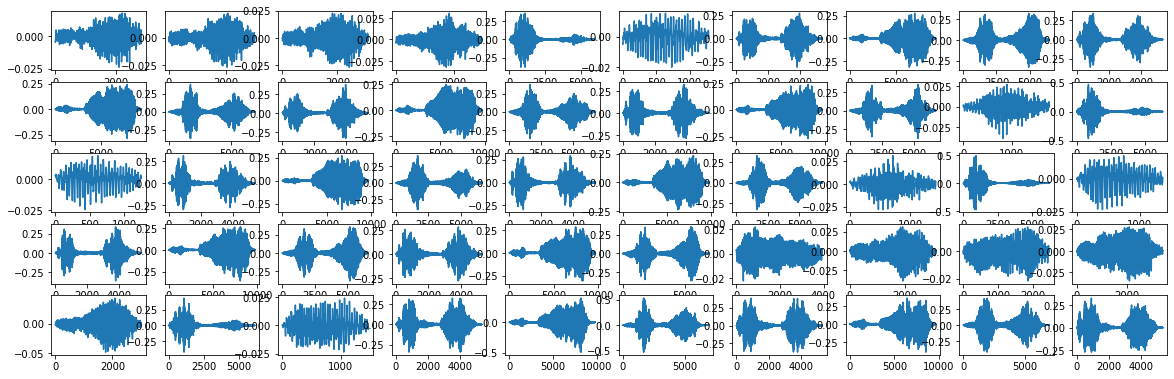

In [70]:
# Plot some audio syllables
sylls = syllable_df.audio.values

nrows = 5
ncols = 10
zoom = 2
fig, axs = plt.subplots(ncols=ncols, nrows = nrows,figsize = (ncols*zoom, nrows+zoom/1.5))
for i, syll in tqdm(enumerate(sylls), total = nrows*ncols):
    ax = axs.flatten()[i]
    ax.plot(syll)
    if i == nrows*ncols -1:
        break

# Spectrogram generation section


In [71]:
# Make spectrogram
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.spectrogram import draw_spec_set_actual
from avgn.signalprocessing.create_spectrogram_dataset import make_spec, mask_spec, log_resize_spec, pad_spectrogram
from avgn.visualization.spectrogram import plot_spec, visualize_spec

from avgn.utils.audio import load_wav, read_wav
from avgn.signalprocessing.filtering import butter_bandpass_filter
from avgn.signalprocessing.spectrogramming import spectrogram

In [72]:
(dataset.wav_files[10].as_posix())

'/content/Nest-Seq-Analysis/data/processed/zebra_finch_sakata/2021-06-24_21-38-51/WAV/isab_0007.WAV'

In [73]:
#### -----------   Plotting a sample data file --------------------- ####
rate, data_loaded = load_wav(dataset.wav_files[10])
data = data_loaded
times = np.linspace(0,len(data)/rate,len(data));

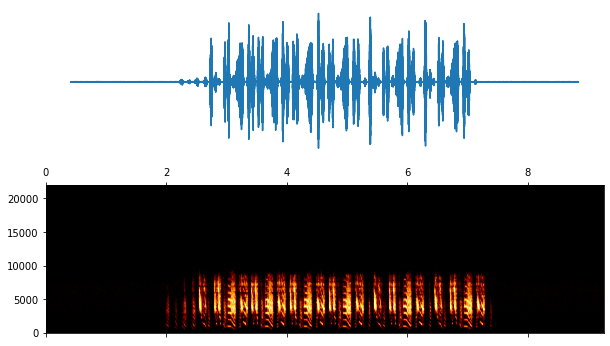

In [74]:
# Plot audio and spectrogram of sample audio file
# filter data
butter_min = hparams.butter_lowcut
butter_max = hparams.butter_highcut
data = butter_bandpass_filter(data, butter_min, butter_max, rate)

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(10, 6))
axs[0].set_axis_off()
axs[0].get_tightbbox('True')
axs[0].plot(times,data)
# ax[0].axis('off')


hparams.sample_rate = rate

hparams.ref_level_db = 60
spec_orig = spectrogram(data,
                            rate,
                            hparams)
plot_spec(
    norm(spec_orig),
    fig=fig,
    ax=axs[1],
    rate=rate,
    hop_len_ms=hparams.hop_length_ms,
    cmap=plt.cm.afmhot,
    show_cbar=False,
    figsize=(10, 6),
)

In [75]:
syllables_wav = syllable_df.audio.values
syllables_rate = syllable_df.rate.values

In [76]:
np.shape(syllables_wav)

(1067,)

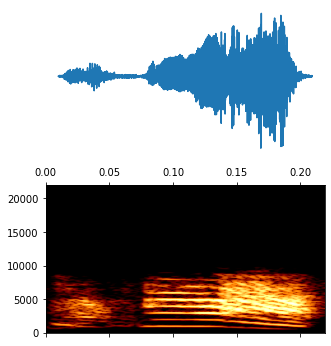

In [77]:
###  ---  Indivdual audio snippet  ----   ###
i=50

spec = spectrogram(syllables_wav[i], syllables_rate[i], hparams)

times = np.linspace(0,len(syllables_wav[i])/syllables_rate[i],len(syllables_wav[i]));

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(5, 6))
axs[0].set_axis_off()
axs[0].get_tightbbox('True')
axs[0].plot(times,syllables_wav[i])

plot_spec(
    norm(spec),
    fig=fig,
    ax=axs[1],
    rate=syllables_rate[i],
    hop_len_ms=hparams.hop_length_ms,
    cmap=plt.cm.afmhot,
    show_cbar=False,
    figsize=(5, 6),
)

In [ ]:
# ### --- Displays specs in sequence of windows --- ###

# for i in range(0,50):
#     fig, axs = plt.subplots(nrows=1,ncols=1, figsize=(5, 6))
#     plot_spec(
#         norm(syllable_df.spectrogram.values[i]),
#         fig=fig,
#         ax=axs,
#         rate=syllables_rate[i],
#         hop_len_ms=hparams.hop_length_ms,
#         cmap=plt.cm.afmhot,
#         show_cbar=False,
#         figsize=(5, 6),
#     )
#     plt.title(i)
#     plt.show(block=False)
#     plt.pause(0.5)
#     plt.close()

In [78]:
### --- Compute Spectrograms --- ###

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    # create spectrograms
    syllables_spec = parallel(
        delayed(spectrogram)(
            syllable,
            rate,
            hparams=dataset.hparams
        #     mel_matrix=dataset.mel_matrix,
        #     use_mel=True,
        #     use_tensorflow=False,
         )
        for syllable, rate in tqdm(
            zip(syllables_wav, syllables_rate),
            total=len(syllables_rate),
            desc="getting syllable spectrograms",
            leave=False,
        )
    )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=2835
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=3021
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=3124
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=4096 is too small for input signal of length=2978
  n_fft, y.shape[-1]
[Parallel(n_jobs=1)]: Done   4 out of   4 |

In [ ]:
# draw_spec_set_actual(syllables_spec, zoom=1, maxrows=10, colsize=25)

In [ ]:
# ####  -----------  Rescaling --------  #### (Avoid this if possible)
    
# log_scaling_factor = 4

# with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
#     syllables_spec = parallel(
#         delayed(log_resize_spec)(spec, scaling_factor=log_scaling_factor)
#         for spec in tqdm(syllables_spec, desc="scaling spectrograms", leave=False)
#     )  

In [79]:
syll_lens = [np.shape(i)[1] for i in syllables_spec]
pad_length = np.max(syll_lens) # Set this as 467 based on Nest 2
print(pad_length)
if pad_length < 467:
  pad_length = 467
else:
  print('New syllable with longer syllable length found')

292


In [80]:
pad_length

467

In [81]:
###  Discards the top half of frequency range ###

def freq_range_reduction(spec, yrange=0.5):
    ylim = int(np.floor(spec.shape[0]*yrange))
    spec = spec[:ylim,:]
    return spec

with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:
    
    syllables_spec = parallel(
        delayed(freq_range_reduction)(spec, yrange=0.5)
        for spec in tqdm(
            syllables_spec, desc="resizing spectrogram frequency", leave=False
        )
    )
# np.shape(syllables_spec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1067 out of 1067 | elapsed:    0.1s finished


In [82]:
with Parallel(n_jobs=n_jobs, verbose=verbosity) as parallel:

    syllables_spec = parallel(
        delayed(pad_spectrogram)(spec, pad_length)
        for spec in tqdm(
            syllables_spec, desc="padding spectrograms", leave=False
        )
    )
np.shape(syllables_spec)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1067 out of 1067 | elapsed:    4.7s finished


(1067, 1024, 467)

In [83]:
### To save space back to dataframe
syllables_spec = [(norm(i)*255).astype('uint8') for i in tqdm(syllables_spec)]

syllable_df['spectrogram'] = syllables_spec

In [84]:
save_loc = DATA_DIR / 'syllable_dfs' / DATASET_ID / 'zf_Nest6_isab_noRescale.pickle'

In [85]:
save_loc

PosixPath('/content/Nest-Seq-Analysis/data/syllable_dfs/zebra_finch_sakata/zf_Nest6_isab_noRescale.pickle')

In [86]:
ensure_dir(save_loc)
syllable_df.to_pickle(save_loc)

In [46]:
del syllable_df